**Hesed Guwn **

Spring 2022

CS 251: Data Analysis and Visualization

# Lab 3a: Linear Regression

## Task 1. Mystery Data 1

### 1a) Import the data

1. Import data 'data/mystery_data_1.csv' (using your data class or [genfromtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.genfromtxt.html))
2. Print first 10 lines rows of data.

#### 1b) Using the following links and MatPlotLib documentation to view the data:
- [MatPlotLib](https://matplotlib.org/)
- [MatPlotLib hist](https://matplotlib.org/gallery/statistics/hist.html)
1. Create a figure with 3 subplots
    1. One scatterplot with column X on the x-axis and column Y on the y-axis.
    1. Two historgrams one for the X data and the other for the Y data.
    2. Create the histograms with 10 bins.
    3. Include a title for each subplot.

C:\Users\hekaj\AppData\Local\Temp\ipykernel_32404\2933150515.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
C:\Users\hekaj\AppData\Local\Temp\ipykernel_32404\2933150515.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])


[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]

-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------



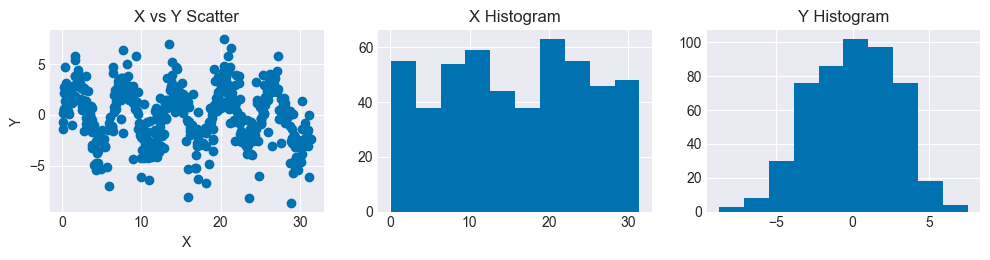

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams["figure.figsize"] = [12,4.5]

data = np.genfromtxt('data/mystery_data_1.csv',delimiter=",")
print(data[2:12])

figure = plt.figure(figsize=[12,8])
ax = figure.add_subplot(331)
ax.scatter(data[:,0],data[:,1])
plt.title("X vs Y Scatter")
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax = figure.add_subplot(332)
ax.hist(data[:,0],bins=10)
plt.title("X Histogram")

ax = figure.add_subplot(333)
ax.hist(data[:,1],bins=10)
plt.title("Y Histogram")

print('''
-----------------------------------
Your results should look like this:
-----------------------------------
First 10 rows:
[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
-----------------------------------
''')

## Task 2. Analyze Mystery Data 1

### 2a) Use scipy to calculate the linear regression for Mystery Data 1 

1. Print first 10 lines rows of data.
2. Calculate the linear regression [scipy.linalg.lstsq](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lstsq.html)
    1. The x column is the left hand side array and the y column is the right hand side array.
    2. This includes adding homogeneous coordinates (for the intercept) to the A matrix. 
    3. Useful methods: [hstack](https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html), [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html) and [reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
3. Print the least-squares solution and residues
4. Using the residual, calculate and print the $R^2$ value
    1. $R^2 = 1 - \frac{residues}{smd}$
    2. The square mean deviation: $smd = \sum (y - \frac{\sum y}{n} )^2$

In [69]:
import scipy.linalg as sp

print(data[2:12])
ones = np.ones([data.shape[0]-2,1])
x = data[2:502,0]
x = np.reshape(x,(500,1))
x = np.hstack((ones,x))
# print(x)

y = data[2:502,1]

newData = sp.lstsq(x,y)
print(newData)

smd = (np.sum((y - ((np.sum(y)/y.shape[0])) )**2))

print("R^2 = " + str(1 - (newData[1]/smd)))

print('''
-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------
''')

[[ 9.185  0.536]
 [29.323 -3.209]
 [26.767  2.751]
 [17.792 -2.81 ]
 [14.624  2.409]
 [ 8.078  3.677]
 [ 3.736 -3.28 ]
 [10.999 -2.997]
 [18.113 -3.055]
 [ 3.33  -0.443]]
(array([ 0.92884793, -0.05650709]), 3722.8001542015754, 2, array([404.59762655,  11.16556363]))
R^2 = 0.033824411486558126

-----------------------------------
Your results should look like this:
----------------------------------- 
c: [ 0.92884793 -0.05650709]

residues: 3722.8001542015754

r2: 0.033824411486558126
-----------------------------------



### 2b) Visualize linear regression results with matplotlib

1. Plot a scatterplot of the mystery data X on the x axis and Y on the y axis
2. Plot a line representing the linear regression
    1. For line_x, use [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to create 100 points from the min x value to the max x value
    2. For line_y, multiply line_x by the slope and add the intercept
3. Include a title (with $R^2$ value), legend, x label and y label

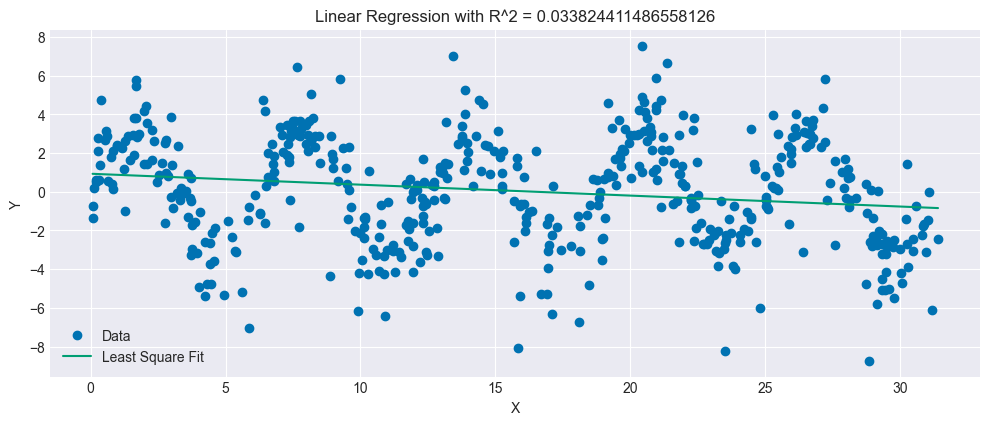

In [72]:
x = data[2:502,0]
y = data[2:502,1]
plt.plot(x,y,'o')
x_line = np.linspace(x.min(),x.max(),100)
y_line = x_line * newData[0][1] + newData[0][0]
plt.plot(x_line,y_line)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(["Data","Least Square Fit"])
plt.title("Linear Regression with R^2 = 0.033824411486558126")
plt.show()

### 2c)  Interpret the results of the linear regression of the dataset 

Interpret the results based on your plot and $R^2$ value. Is the linear regression model a good model for the data? Why?

Since the R^2 value is close to 0 there is almost no relationship/correlation between these two variables. Since there is practically no relationship, this linear regression model is not good for the data.  